# Data Wrangling & Processing

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [205]:
data = pd.read_csv('/content/sales_data.csv')
data = pd.DataFrame(data)
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [206]:
data.shape

(1000, 17)

In [207]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [208]:
data.size

17000

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [210]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [211]:
data.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [212]:
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%m/%d/%Y %H:%M')
data = data.drop(columns=['Date', 'Time'])
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00


In [213]:
data.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [214]:
data.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


# Exploratory Data Analysis

**A. General Sales Insights**

1. **What is the total revenue for the entire dataset?**  
   Analyze the overall sales performance by summing up the `Total` column.

2. **Which branch contributes the most to the total revenue?**  
   Compare revenue across branches (A, B, C) to identify the top-performing branch.

3. **What percentage of revenue comes from each city?**  
   Calculate each city's revenue contribution relative to the total revenue.

**B. Customer Behavior**

1. **What is the gender distribution of customers?**  
   Count male vs. female customers to understand the primary customer demographic.

2. **How does customer type (Member vs. Normal) distribution look?**  
   Determine the proportion of Members vs. Non-Members to analyze loyalty trends.

3. **What is the average customer rating based on gender and customer type?**  
   Analyze how ratings vary across demographics to assess customer satisfaction.

**C. Product Insights**

1. **Which product line generates the most revenue?**  
   Identify top-performing categories by summing revenue (`Total`) per product line.

2. **Which product line is the most profitable (Gross Income)?**  
   Determine the most lucrative category by evaluating `Gross Income`.

3. **What are the average unit price and quantity sold for each product line?**  
   Analyze pricing and purchasing patterns to understand customer preferences.

**D. Time-Based Analysis**

1. **What is the monthly revenue trend?**  
   Group revenue by month to track sales performance over time.

2. **Which day of the week has the highest sales?**  
   Examine daily revenue trends to identify peak shopping days.

3. **What are the peak transaction times?**  
   Analyze transaction times to determine the busiest shopping hours.

**E. Payment Method Preferences**

1. **What is the distribution of payment methods used?**  
   Count the usage of Cash, Ewallet, and Credit card to understand payment preferences.

2. **Which payment method is most popular in each branch and city?**  
   Evaluate payment trends across locations to spot regional preferences.

**F. Profitability Analysis**

1. **What is the average gross income per branch and city?**  
   Compare profitability across branches and cities to identify top performers.

2. **Which product lines have the highest and lowest gross margins?**  
   Analyze profit margins to identify the most efficient categories.

**G. Customer Experience**

1. **How are customer ratings distributed?**  
   Visualize the spread of ratings to understand customer satisfaction levels.

2. **Is there a relationship between ratings and total revenue?**  
   Explore whether higher ratings correlate with higher sales.


## A. General Sales Insights

### O1. What is the total revenue for the entire dataset?

In [215]:
total_revenue = data['Total'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

Total Revenue: $322,966.75


### O2. Which branch contributes the most to the total revenue?

In [216]:
branch_revenue = data.groupby('Branch')['Total'].sum()
branch_revenue

,Total
Branch,
A,106200.3705
B,106197.6720
C,110568.7065


In [217]:
highest_revenue_branch = branch_revenue.idxmax()
highest_revenue_branch_revenue = branch_revenue.max()
print(f'Highest Revenue branch is branch {highest_revenue_branch} with ${highest_revenue_branch_revenue:,.2f} revenue' )

Highest Revenue branch is branch C with $110,568.71 revenue


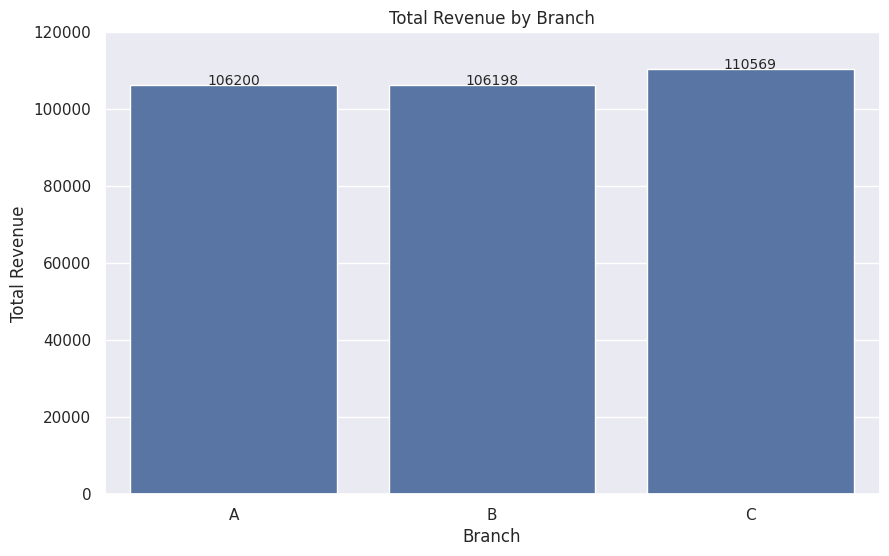

In [218]:
plt.figure(figsize=(10, 6))
sns.barplot(x=branch_revenue.index,
            y=branch_revenue.values)

for i, value in enumerate(branch_revenue):
    plt.text(i, value, f'{value:.0f}', ha='center', fontsize=10)

plt.title('Total Revenue by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Revenue')
plt.yticks(range(0, int(branch_revenue.max()) + 20000, 20000))
plt.show()

### O3. What percetage of revenue comes from each city?

In [219]:
city_percentage_revenue = data.groupby('City')['Total'].sum() / data['Total'].sum() * 100
city_percentage_revenue.sort_values(ascending=False)

,Total
City,
Naypyitaw,34.235322
Yangon,32.882757
Mandalay,32.881921


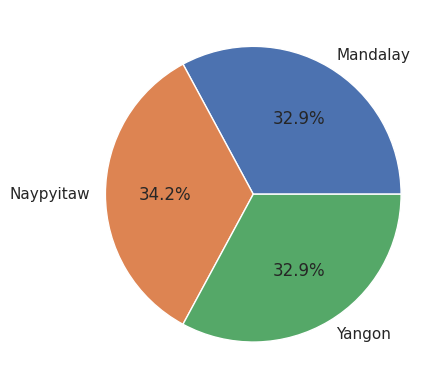

In [220]:
plt.pie (
    data=city_percentage_revenue,
    x=city_percentage_revenue.values,
    labels=city_percentage_revenue.index,
    autopct='%1.1f%%')

plt.show()

## B. Customer Behavior

### O1. What is the gender distribution of customers?

In [221]:
customers_gender = data['Gender'].value_counts()
customers_gender

,count
Gender,
Female,501
Male,499


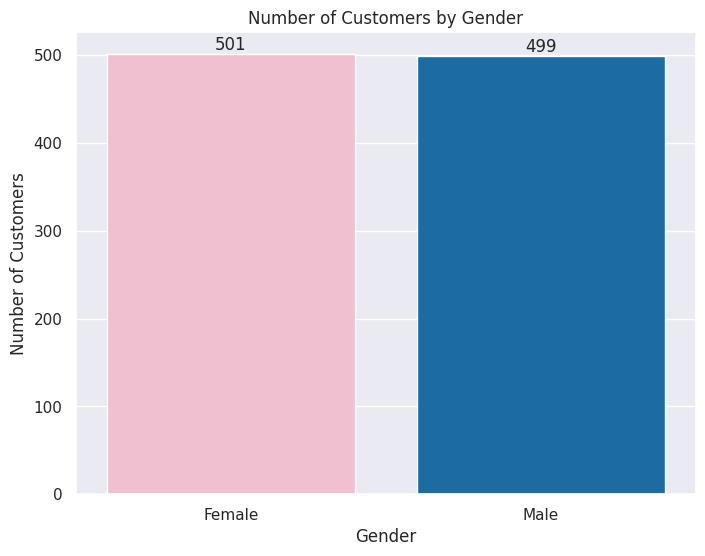

In [222]:
colors = ['#F8B7CD', '#0671B7']

plt.figure(figsize=(8, 6))
sns.barplot(x=customers_gender.index,
            y=customers_gender.values,
            hue=customers_gender.index,
            palette=colors,
            legend=False)


for i, value in enumerate(customers_gender.values):
    plt.text(i, value + 5, f"{value}", ha='center', fontsize=12)

plt.title('Number of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


In [223]:
customers_gender_percentage = data['Gender'].value_counts() / data['Gender'].count() * 100
customers_gender_percentage

,count
Gender,
Female,50.1
Male,49.9


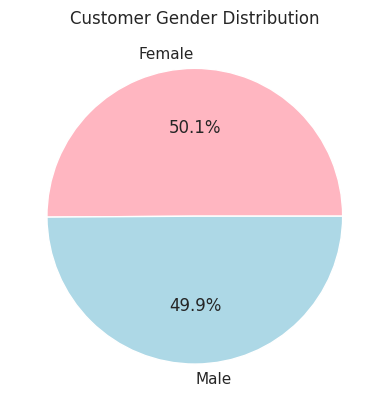

In [224]:
colors = ['#FFB6C1', '#ADD8E6']

plt.pie(customers_gender_percentage.values,
        labels=customers_gender_percentage.index,
        autopct='%1.1f%%',
        colors=colors)

plt.title('Customer Gender Distribution')
plt.show()


### O2. How does customer type (Member vs Normal) distribution look?

In [225]:
customer_type_distribution = data['Customer type'].value_counts()
customer_type_distribution

,count
Customer type,
Member,501
Normal,499


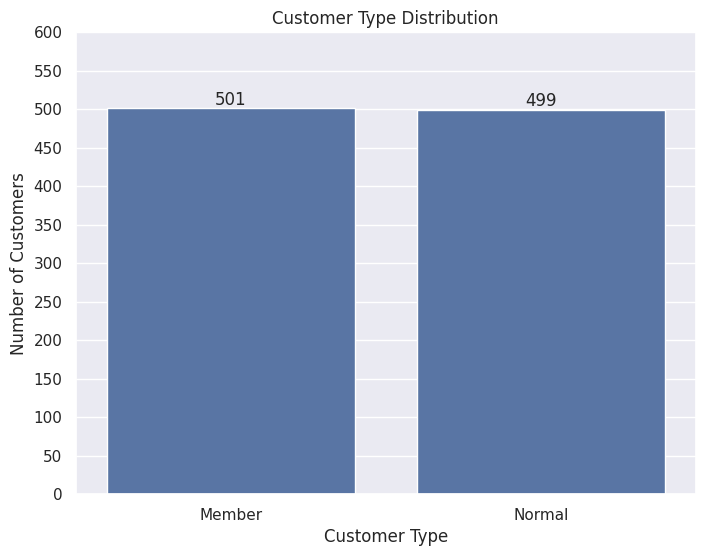

In [226]:
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_type_distribution.index,
            y=customer_type_distribution.values)

for i, value in enumerate(customer_type_distribution.values):
    plt.text(i, value + 5, f"{value}", ha='center', fontsize=12)

plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.yticks(range(0, customer_type_distribution.max() + 100, 50))
plt.show()

### O3. What is the average customer rating based on gender and customer type?

In [227]:
avg_customer_rating_by_gender_and_type = data.groupby(['Gender', 'Customer type'])['Rating'].mean().reset_index(name='Rating')
avg_customer_rating_by_gender_and_type

,Gender,Customer type,Rating
0,Female,Member,6.940613
1,Female,Normal,6.990417
2,Male,Member,6.940000
3,Male,Normal,7.018919


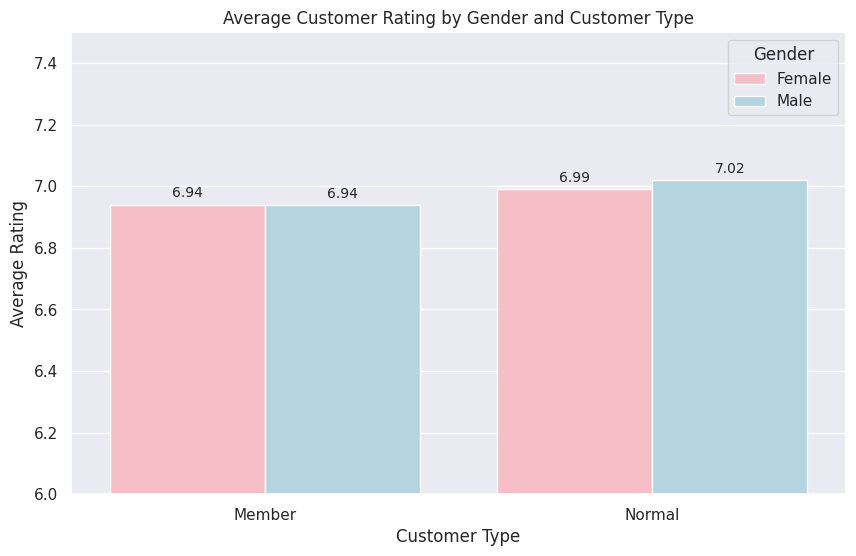

In [228]:
colors = ['#FFB6C1', '#ADD8E6']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_customer_rating_by_gender_and_type,
                 x='Customer type',
                 y='Rating',
                 hue='Gender',
                 palette=colors)

# Add values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

plt.title('Average Customer Rating by Gender and Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.ylim(6, 7.5)
plt.show()


## C. Products Insights

### O1. Which product line generates the most revenue?

In [229]:
revenue_product_line = data.groupby('Product line')['Total'].sum()
print(f"Most revenue product line is {revenue_product_line.idxmax()} with ${revenue_product_line.max()} revenue")

revenue_product_line.sort_values(ascending=False)

Most revenue product line is Food and beverages with $56144.844 revenue


,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


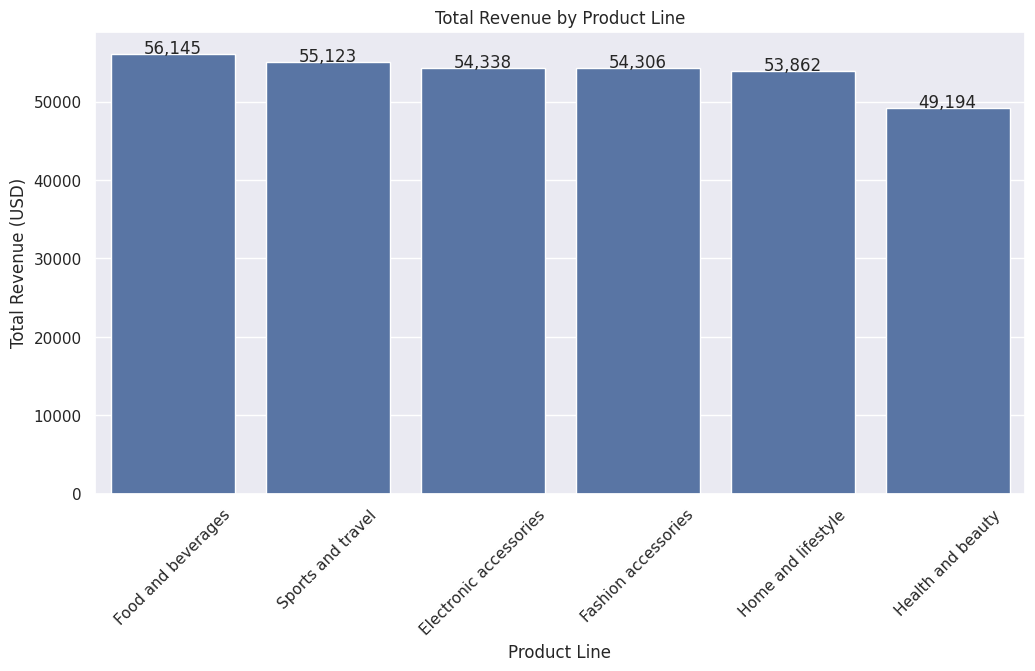

In [230]:
revenue_product_line_sorted = revenue_product_line.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_product_line_sorted.index,
            y=revenue_product_line_sorted.values)

for i, value in enumerate(revenue_product_line_sorted.values):
    plt.text(i, value + 100, f"{value:,.0f}", ha='center', fontsize=12)

plt.title('Total Revenue by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

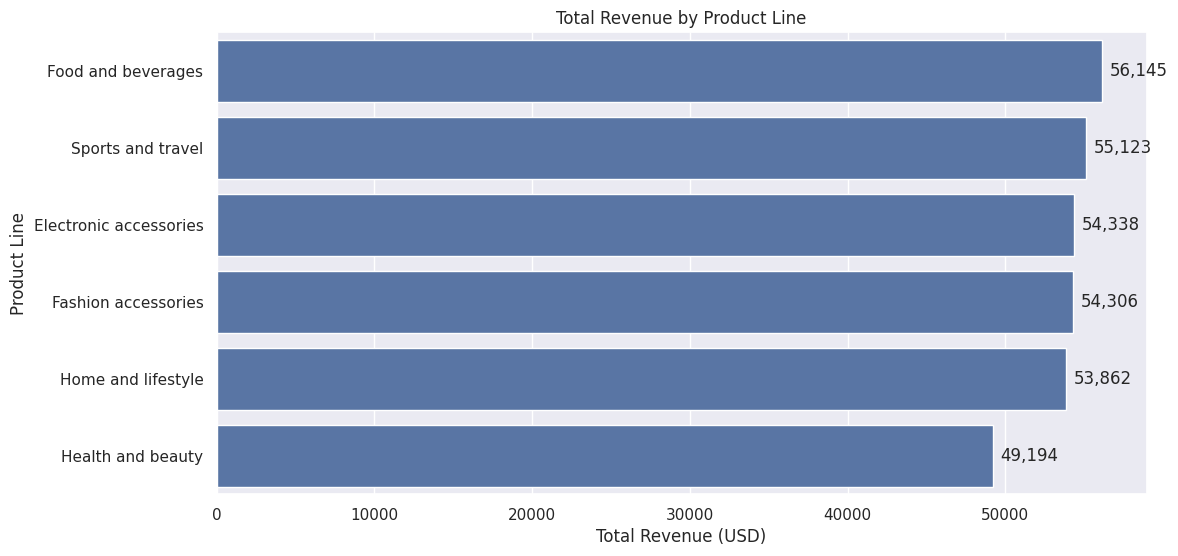

In [231]:
# Horizontal Barplot

plt.figure(figsize=(12, 6))
sns.barplot(y=revenue_product_line_sorted.index,
            x=revenue_product_line_sorted.values)

for i, value in enumerate(revenue_product_line_sorted.values):
    plt.text(value + 500, i, f"{value:,.0f}", va='center', fontsize=12)

plt.title('Total Revenue by Product Line')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Line')
plt.show()


### O2. Which product line is the most profitable (Gross Income)?

In [269]:
profit_product_line = data.groupby('Product line')['gross income'].sum()
print(f"Most profitable product line is {profit_product_line.idxmax()} with ${profit_product_line.max()} gross income")

Most profitable product line is Food and beverages with $2673.564 gross income


In [270]:
profit_product_line.sort_values(ascending=False)

,gross income
Product line,
Food and beverages,2673.5640
Sports and travel,2624.8965
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Home and lifestyle,2564.8530
Health and beauty,2342.5590


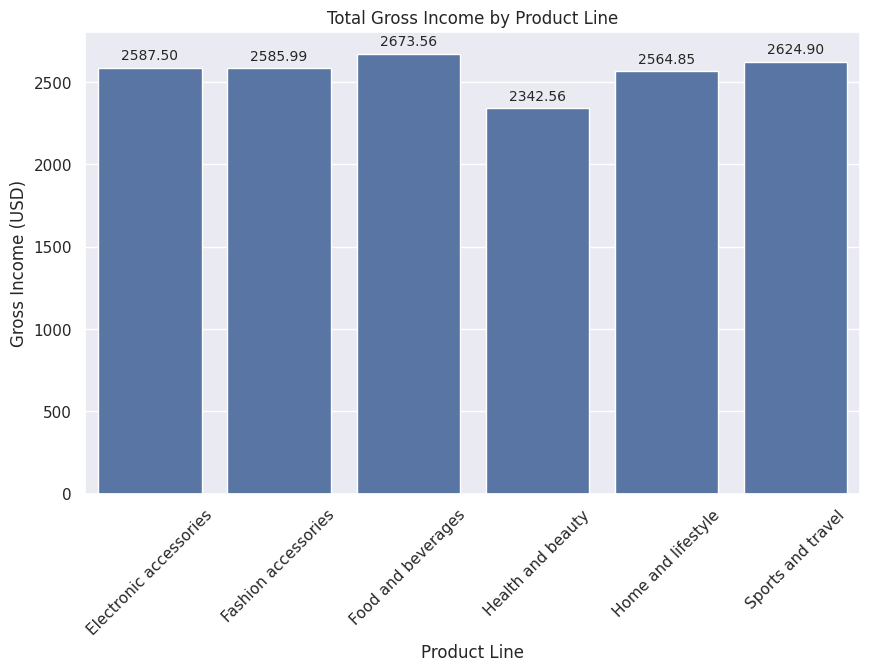

In [234]:
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_product_line.index, y=profit_product_line.values)

for i, value in enumerate(profit_product_line.values):
    plt.text(i, value + 50, f"{value:.2f}", ha='center', fontsize=10)

plt.title('Total Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Gross Income (USD)')
plt.xticks(rotation=45)
plt.show()

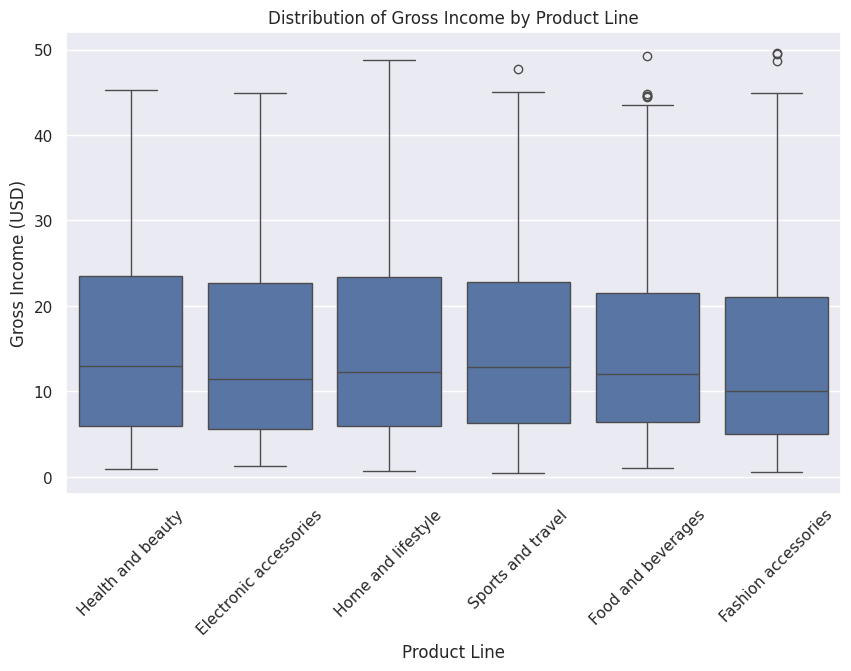

In [235]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='gross income', data=data)

plt.title('Distribution of Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Gross Income (USD)')
plt.xticks(rotation=45)
plt.show()


- **Food and Beverages** and **Sports and Travel** have some transactions with much higher gross income compared to others, shown by the outliers. These outliers represent exceptionally **high-profit transactions**.

- The **median gross income** is similar across most categories. However, **Fashion Accessories** has the **lowest median**, while other categories, including **Health and Beauty**, have slightly higher medians.

- The **whiskers** are of similar length for most categories, meaning the variation in gross income within each product line is **roughly the same**.

### O3. What are the average unit price and quantity sold for each product line?

In [236]:
avg_unit_price_quantity_product_line = data.groupby('Product line')[['Unit price', 'Quantity']].mean()
avg_unit_price_quantity_product_line

,Unit price,Quantity
Product line,,
Electronic accessories,53.551588,5.711765
Fashion accessories,57.153652,5.067416
Food and beverages,56.008851,5.471264
Health and beauty,54.854474,5.618421
Home and lifestyle,55.316937,5.693750
Sports and travel,56.993253,5.542169


<ipython-input-237-a2e21bec0ecb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unit_price_quantity_product_line.index,


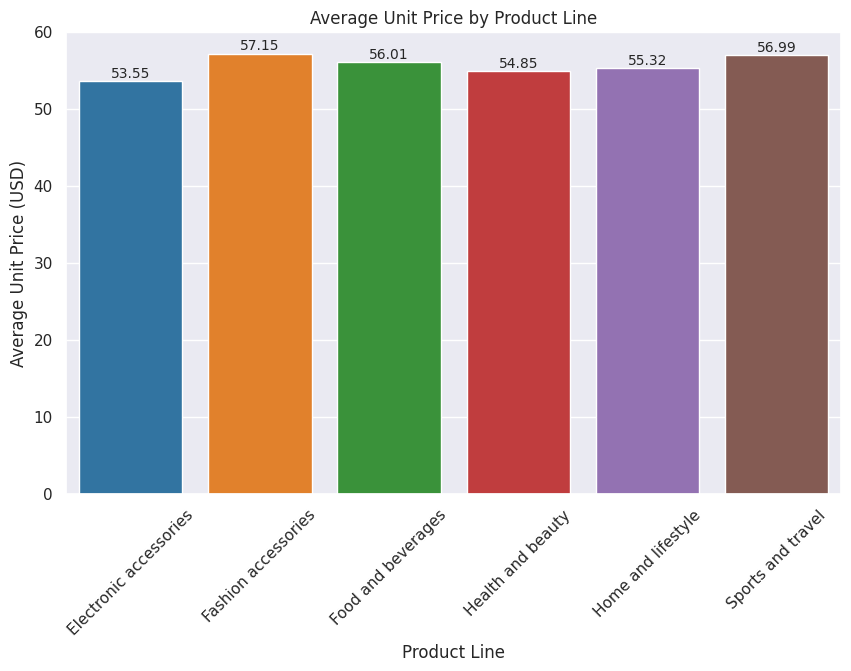

In [237]:
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_unit_price_quantity_product_line.index,
            y=avg_unit_price_quantity_product_line['Unit price'],
            palette=colors)

for i, value in enumerate(avg_unit_price_quantity_product_line['Unit price']):
    plt.text(i, value + 0.5, f"{value:.2f}", ha='center', fontsize=10)

plt.title('Average Unit Price by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Unit Price (USD)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-238-409e7ae08d81>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unit_price_quantity_product_line.index,


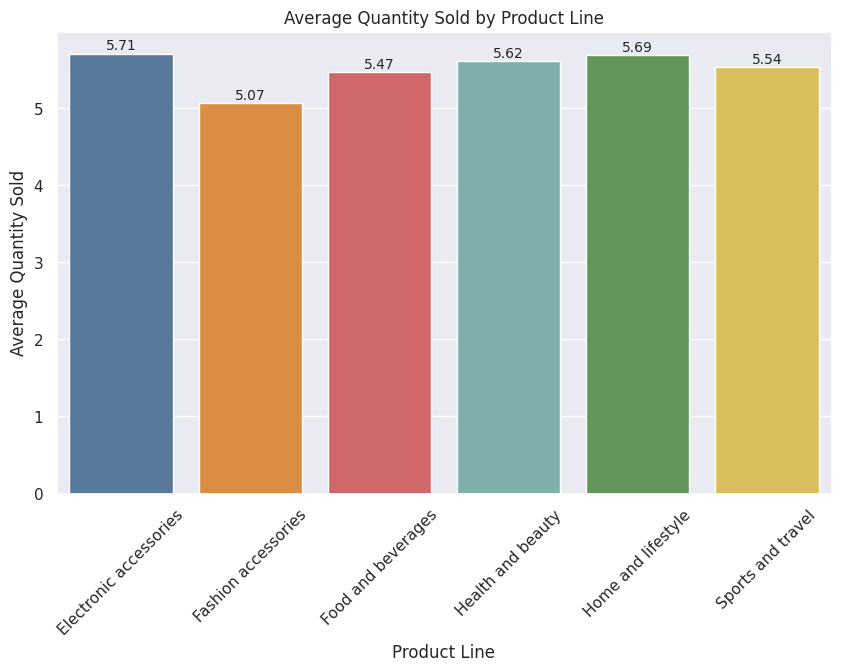

In [238]:
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC949']

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_unit_price_quantity_product_line.index,
            y=avg_unit_price_quantity_product_line['Quantity'],
            palette=colors)

for i, value in enumerate(avg_unit_price_quantity_product_line['Quantity']):
    plt.text(i, value + 0.05, f"{value:.2f}", ha='center', fontsize=10)

plt.title('Average Quantity Sold by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=45)
plt.show()

## D. Time-Based Analysis

### O1. Which is the monthly revenue trend?

In [239]:
data['Month'] = data['datetime'].dt.strftime('%B')

monthly_revenue_trend = data.groupby('Month')['Total'].sum()
monthly_revenue_trend

,Total
Month,
February,97219.374
January,116291.868
March,109455.507


In [240]:
month_order = ['January', 'February', 'March']
monthly_revenue_trend = monthly_revenue_trend[month_order]
monthly_revenue_trend

,Total
Month,
January,116291.868
February,97219.374
March,109455.507


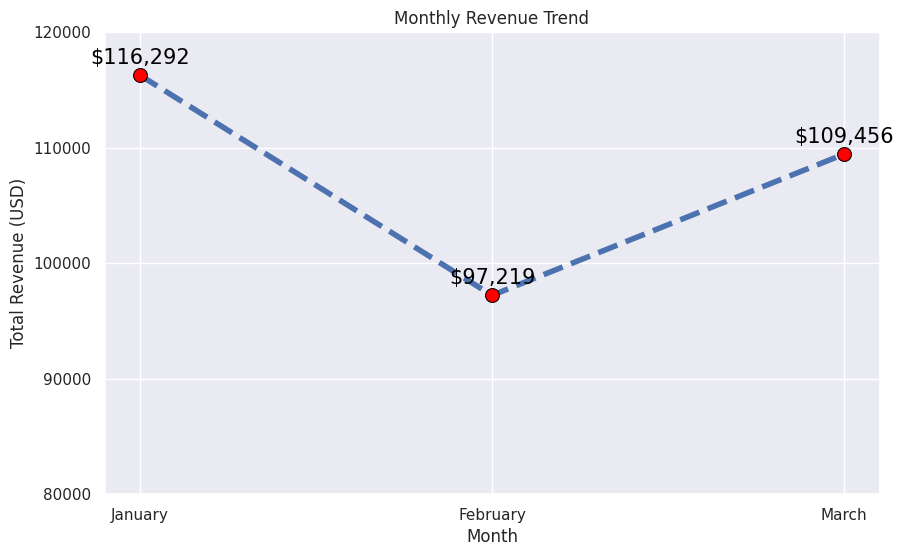

In [241]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x=monthly_revenue_trend.index,
    y=monthly_revenue_trend.values,
    linestyle='--', linewidth=4,
    marker='o', markersize=10,
    markerfacecolor='red', markeredgecolor='black'
)

for i, value in enumerate(monthly_revenue_trend.values):
    plt.text(i, value + 1000, f"${value:,.0f}", ha='center', fontsize=15, color='black')

plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')

max_value = monthly_revenue_trend.max()
plt.yticks(range(80000, int(max_value) + 10000, 10000))

plt.show()

### O2. Which day of the week has the highest sales?

In [242]:
data['Day'] = data['datetime'].dt.strftime('%A')
daily_revenue_trend = data.groupby('Day')['Total'].sum()

# Order the day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_revenue_trend = daily_revenue_trend.reindex(day_order)

daily_revenue_trend

,Total
Day,
Monday,37899.0780
Tuesday,51482.2455
Wednesday,43731.1350
Thursday,45349.2480
Friday,43926.3405
Saturday,56120.8095
Sunday,44457.8925


In [243]:
# Order the sales
daily_revenue_trend.sort_values(ascending=False)

,Total
Day,
Saturday,56120.8095
Tuesday,51482.2455
Thursday,45349.2480
Sunday,44457.8925
Friday,43926.3405
Wednesday,43731.1350
Monday,37899.0780


In [244]:
print(f'The highest sales occurred on {daily_revenue_trend.idxmax()} with a revenue of ${daily_revenue_trend.max():,.2f}')

The highest sales occurred on Saturday with a revenue of $56,120.81


<ipython-input-245-1562b1fd056d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_revenue_trend.index, y=daily_revenue_trend.values, palette='Set3')


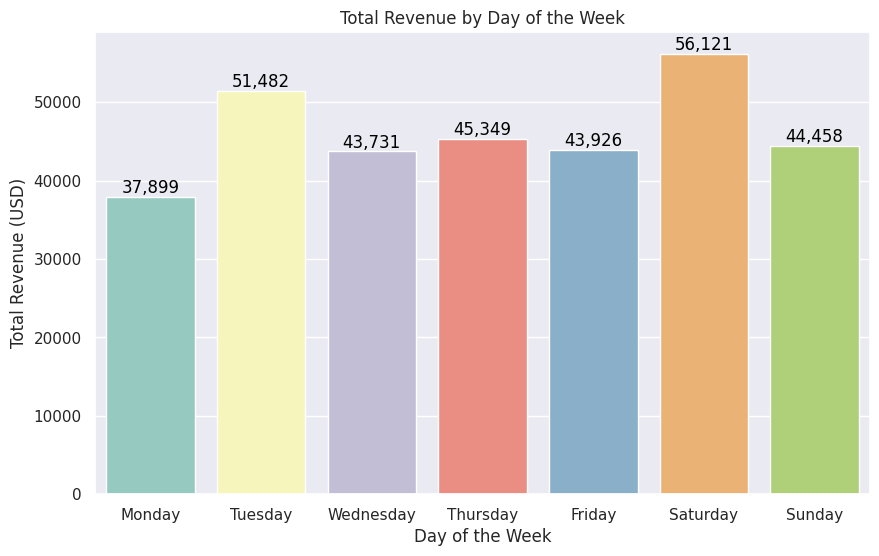

In [245]:
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_revenue_trend.index, y=daily_revenue_trend.values, palette='Set3')

for i, value in enumerate(daily_revenue_trend.values):
    plt.text(i, value + 500, f"{value:,.0f}", ha='center', fontsize=12, color='black')

plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue (USD)')
plt.show()

### O3. What are the peak transaction times?

Peak Transaction Times can refer to:
1. The number of transactions per hour.
2. The total revenue per hour.

We can use line plot and heatmap.

- Line Plot: shows trends over time, like peak hours for transactions or revenue.

- Heatmap: shows how transactions or revenue vary by hour and branch with color intensity.

In [246]:
data['Hour'] = data['datetime'].dt.hour
hourly_transaction_count = data['Hour'].value_counts().sort_index()
hourly_transaction_count

,count
Hour,
10,101
11,90
12,89
13,103
14,83
15,102
16,77
17,74
18,93


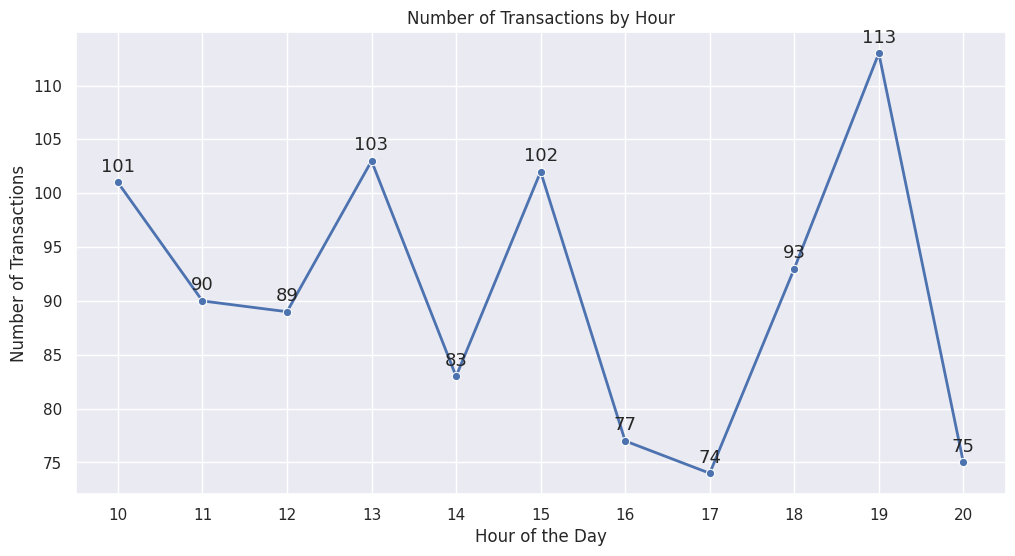

In [247]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_transaction_count.index, y=hourly_transaction_count.values, marker='o', linewidth=2)

for hour, value in zip(hourly_transaction_count.index, hourly_transaction_count.values):
    plt.text(hour, value + 1, f"{value}", ha='center', fontsize=13)

plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(10, 21))
plt.grid(True)
plt.show()


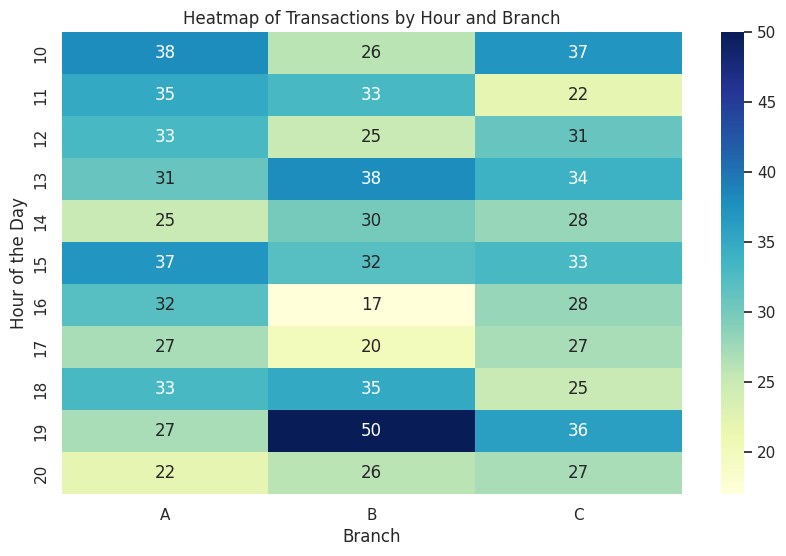

In [248]:
# Create a DataFrame for the heatmap
hourly_data = data.groupby(['Hour', 'Branch']).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_data, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Heatmap of Transactions by Hour and Branch')
plt.xlabel('Branch')
plt.ylabel('Hour of the Day')
plt.show()

In [249]:
hourly_revenue_trend = data.groupby('Hour')['Total'].sum()
hourly_revenue_trend

,Total
Hour,
10,31421.4810
11,30377.3295
12,26065.8825
13,34723.2270
14,30828.3990
15,31179.5085
16,25226.3235
17,24445.2180
18,26030.3400


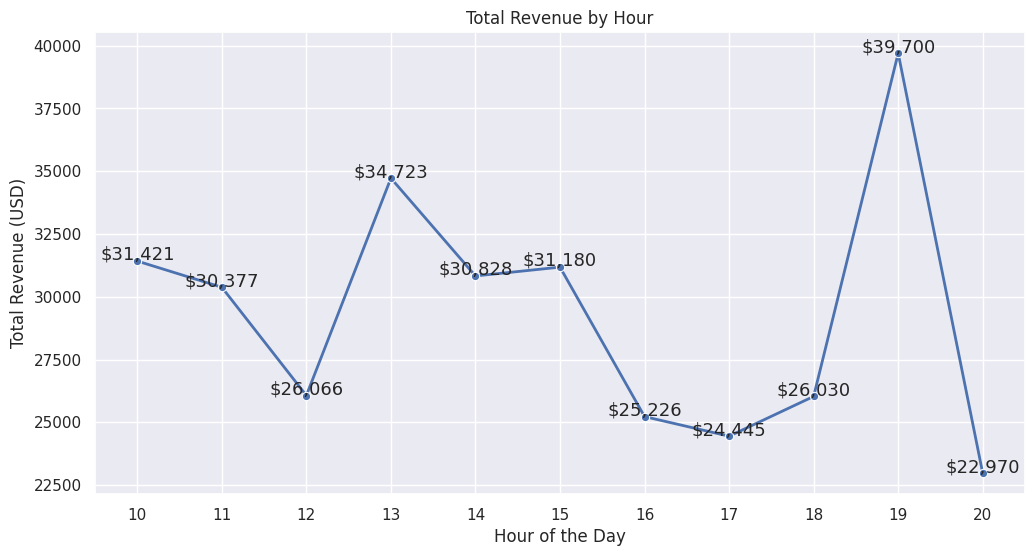

In [250]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_revenue_trend.index, y=hourly_revenue_trend.values, marker='o', linewidth=2)

for hour, value in zip(hourly_revenue_trend.index, hourly_revenue_trend.values):
    plt.text(hour, value + 50, f"${value:,.0f}", ha='center', fontsize=13)

plt.title('Total Revenue by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue (USD)')
plt.xticks(range(10, 21))
plt.grid(True)
plt.show()

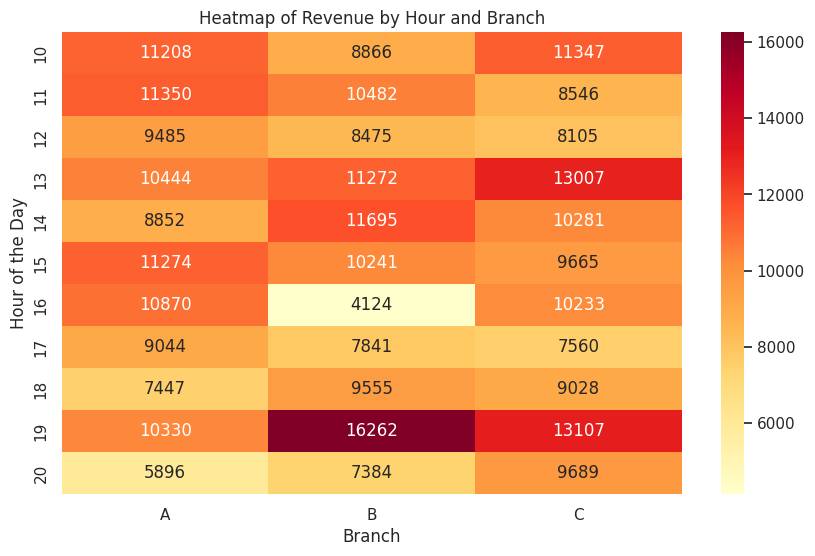

In [251]:
hourly_revenue_data = data.groupby(['Hour', 'Branch'])['Total'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_revenue_data, annot=True, cmap='YlOrRd', fmt='.0f')

plt.title('Heatmap of Revenue by Hour and Branch')
plt.xlabel('Branch')
plt.ylabel('Hour of the Day')
plt.show()


## E. Payment Method Preferences

### O1. What is the distribution of payment methods used?

In [252]:
payment_method_distribution = data['Payment'].value_counts()
payment_method_distribution

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


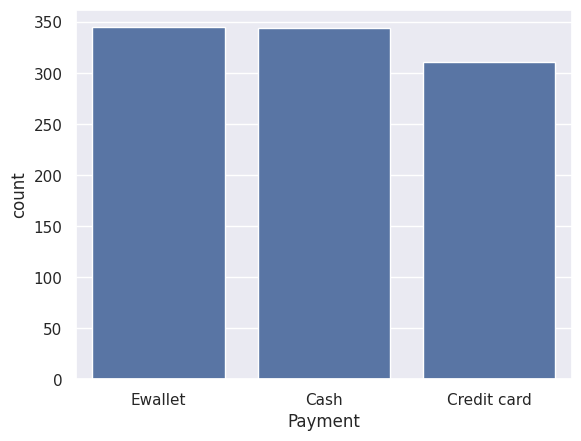

In [253]:
sns.countplot(data=data, x='Payment')
plt.show()

In [254]:
payment_method_percentage = data['Payment'].value_counts(normalize=True) * 100
payment_method_percentage

,proportion
Payment,
Ewallet,34.5
Cash,34.4
Credit card,31.1


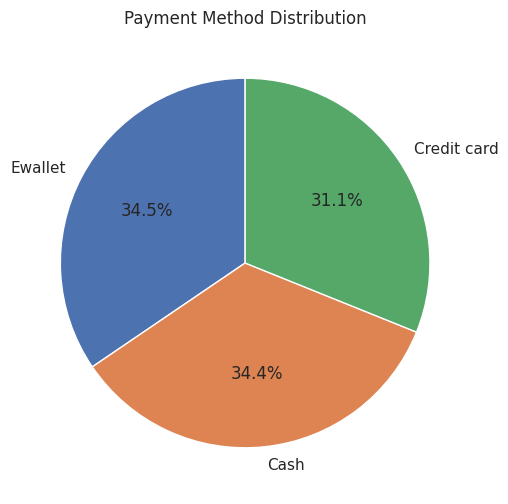

In [255]:
plt.figure(figsize=(8, 6))
plt.pie(
    x=payment_method_percentage.values,
    labels=payment_method_percentage.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Payment Method Distribution')
plt.show()

### O2. Which payment method is most popular in each branch and city?

In [256]:
payment_method_popularity = data.groupby(['Branch', 'Payment']).size().unstack()
payment_method_popularity

Payment,Cash,Credit card,Ewallet
Branch,,,
A,110,104,126
B,110,109,113
C,124,98,106


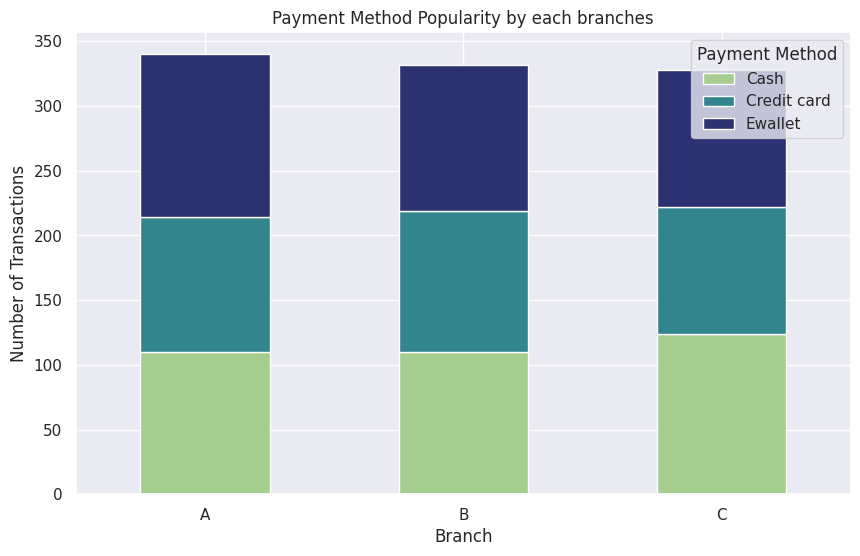

In [257]:
# STACKED BAR CHART
payment_method_popularity.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='crest'
)

plt.title('Payment Method Popularity by each branches')
plt.xlabel('Branch')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Method')
plt.xticks(rotation=0)

plt.show()


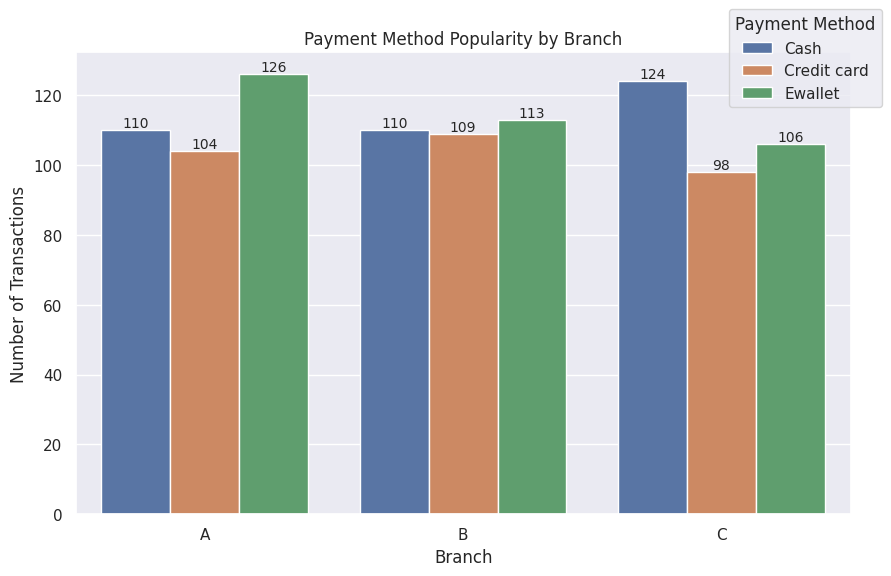

In [258]:
# GROUPED BAR CHART
payment_method_by_branch = data.groupby(['Branch', 'Payment']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=payment_method_by_branch, x='Branch', y='Count', hue='Payment')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, label_type='edge')

plt.title('Payment Method Popularity by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Transactions')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1.11), loc='upper right')
plt.show()


## F. Profitability Analysis

### O1. What is the average gross income per branch?

In [259]:
avg_gross_income_by_branch_city = data.groupby(['Branch', 'City'])['gross income'].mean().reset_index()
avg_gross_income_by_branch_city

,Branch,City,gross income
0,A,Yangon,14.874001
1,B,Mandalay,15.232024
2,C,Naypyitaw,16.052367


<ipython-input-260-9bfd2a7b2d2f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_gross_income_by_branch_city, x='Branch', y='gross income', palette='pastel')


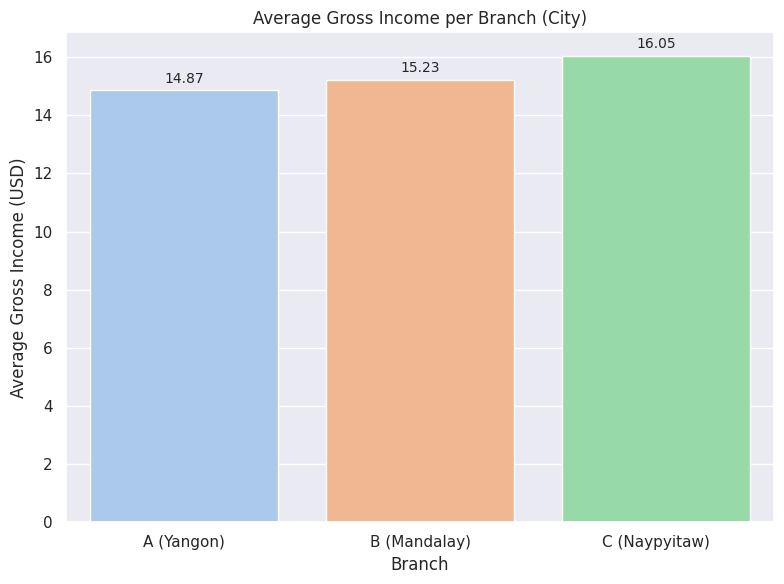

In [260]:
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_gross_income_by_branch_city, x='Branch', y='gross income', palette='pastel')

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.title('Average Gross Income per Branch (City)')
plt.xlabel('Branch')
plt.ylabel('Average Gross Income (USD)')


branch_labels = ['A (Yangon)', 'B (Mandalay)', 'C (Naypyitaw)']
plt.xticks(ticks=range(len(branch_labels)), labels=branch_labels)

plt.tight_layout()
plt.show()


### O2. Which product lines have the highest and lowest gross margins?

In [261]:
avg_gross_margin_by_product_line = data.groupby('Product line')['gross margin percentage'].mean().sort_values()
avg_gross_margin_by_product_line

,gross margin percentage
Product line,
Electronic accessories,4.761905
Fashion accessories,4.761905
Food and beverages,4.761905
Health and beauty,4.761905
Home and lifestyle,4.761905
Sports and travel,4.761905


<ipython-input-262-52bc5444c6aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_gross_margin_by_product_line.values,


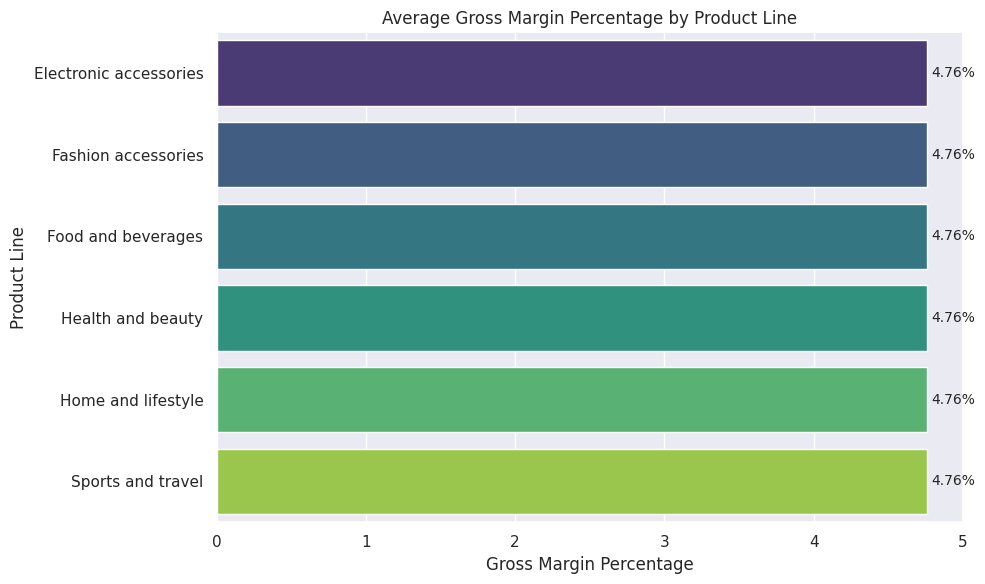

In [262]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_gross_margin_by_product_line.values,
            y=avg_gross_margin_by_product_line.index,
            palette='viridis')

# Add labels on each bar
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', fontsize=10, padding=3)

# Add titles and labels
plt.title('Average Gross Margin Percentage by Product Line')
plt.xlabel('Gross Margin Percentage')
plt.ylabel('Product Line')

plt.tight_layout()
plt.show()

Every product line has a **4.76%** gross margin, showing consistent profitability across categories.

## G. Customer Experience

### O1. How are customer ratings distributed?

In [263]:
customer_rating_distribution = data.groupby('Rating')['Rating'].count()
customer_rating_distribution

,Rating
Rating,
4.0,11
4.1,17
4.2,22
4.3,18
4.4,17
...,...
9.6,17
9.7,14
9.8,19


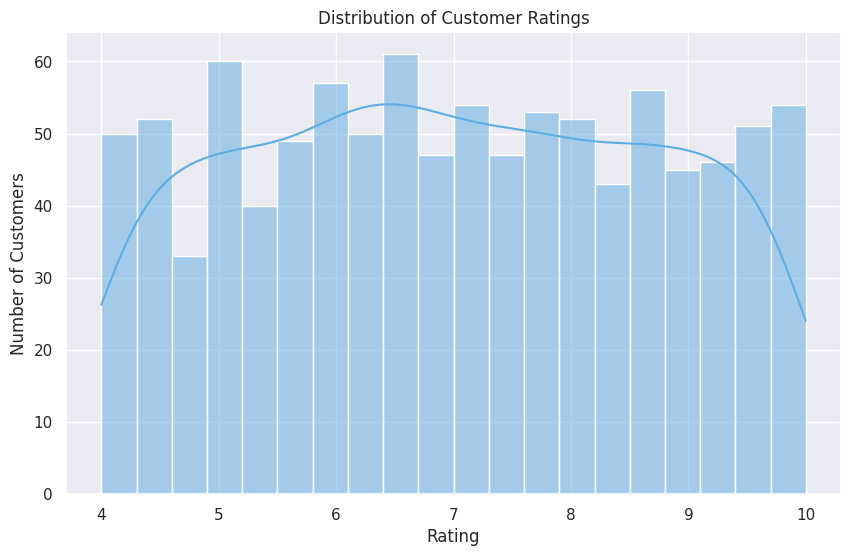

In [264]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True, color='#5DADE2')

plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')

plt.show()

The ratings are **balanced**, ranging from 4 to 10, showing a variety of satisfaction levels. Many customers gave **frequent scores** around 5, 6, and 7. However, high ratings like 9 and 10 also appear often, suggesting a lot of positive experiences.

### O2. Is there a relationship between ratings and total revenue?

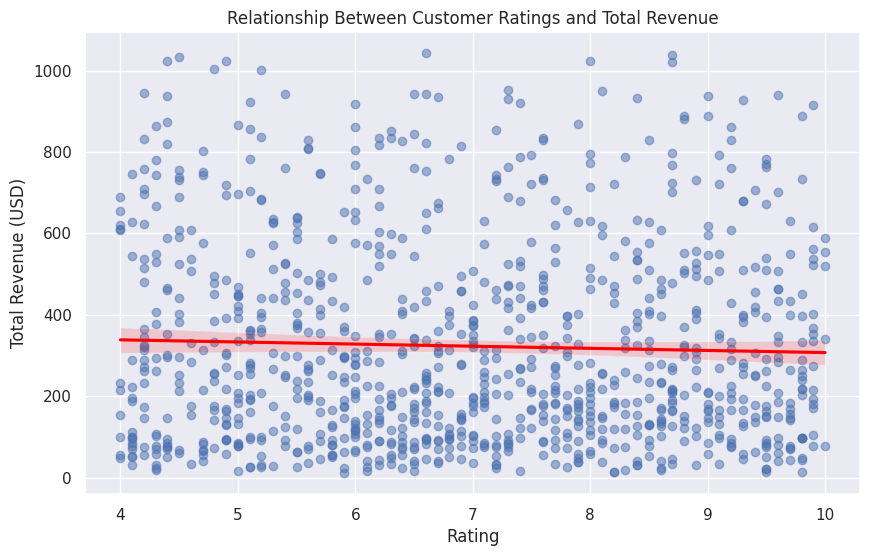

In [265]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='Total', data=data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title('Relationship Between Customer Ratings and Total Revenue')
plt.xlabel('Rating')
plt.ylabel('Total Revenue (USD)')

plt.show()


We can see that:
- **Downward Trend**: The regression line slightly slopes downward, showing no strong link between high ratings and increased revenue.  

- **Wide Spread**: The data points are widely scattered across the rating axis, with most transactions having lower revenue (below $400). This means high ratings don’t always lead to high revenue.

- **Mid-Range Ratings**: Most transactions are clustered around ratings of 6 to 8, though revenue still varies.

Therefore, The relationship between **Customer Rating** and **Total Revenue** seems **weak**. Higher ratings don’t always mean higher revenue, because other factors (like the number of items bought or the price of items) likely have a bigger impact on revenue.

# Summary

1. **General Sales Insights**:
   - The total revenue generated is $322,966.75, with branches contributing nearly equal amounts. This indicates **balanced performance across regions**, suggesting no specific geographical dominance.
   - The cities show almost equal revenue contributions, reflecting a consistent market presence.

2. **Customer Behavior**:
   - Gender and customer type distributions are nearly balanced, suggesting an even market segmentation. However, **Normal (non-member) customers could be explored further** to understand purchasing frequency and conversion potential.

3. **Product Insights**:
   - Revenue and gross income are fairly evenly distributed across product lines, with **Food and Beverages** leading slightly in both metrics.
   - While the gross margin percentage is consistent at 4.76% for all product lines, **average unit price and quantity vary slightly**, suggesting room for pricing strategy adjustments or promotions.

4. **Time-Based Analysis**:
   - **Saturday** is the most revenue-generating day, with Tuesday surprisingly coming second. Peak transaction times occur closer to closing hours (5 PM to 7 PM), which could reflect after-work shopping habits or promotional effects.

5. **Payment Preferences**:
   - Payment methods are evenly distributed across branches, showing no clear preference, which reflects **effective accessibility of payment options**.

6. **Profitability Analysis**:
   - Gross income and revenue are evenly distributed across branches and product lines, suggesting **no standout area for profitability maximization**.

7. **Customer Experience**:
   - Customer ratings are fairly balanced, with no ratings below 4. This reflects **high overall satisfaction**, though ratings don’t strongly correlate with revenue.

# Recommendations
1. **Boost Customer Loyalty**:
   - Investigate customer preferences and purchasing habits to **convert Normal customers into Members**, focusing on frequent non-member buyers.

2. **Enhance Time-Based Strategies**:
   - Leverage peak transaction hours by **introducing time-limited offers** or special closing-hour deals to further drive revenue during high-traffic periods.

3. **Regional Promotions**:
   - Given the balanced branch performance, **local promotions or events tailored to specific cities** could tap into unexplored potential and differentiate revenue contributions.

4. **Product Line Optimization**:
   - Perform a deeper analysis to identify potential high-margin product bundles or **introduce strategic discounts** on underperforming lines to boost sales.

5. **Improved Analytics for Ratings**:
   - Correlate customer ratings with specific transaction details (e.g., product lines, staff interaction, or payment methods) to identify actionable insights for improving overall satisfaction.